# 다양한 데이터 전처리 기법

오늘은 모델에 데이터를 넣기 전까지의 과정, 즉 데이터 전처리를 집중적으로 봅시다. 

> 데이터 분석의 8할은 데이터 전처리다..

전처리에 따라서 데이터 분석의 질이 달라집니다. 전처리가 충분히 되어있지 않거나 잘못된 데이터를 사용하는 경우 분석 결과의 신뢰도가 떨어지고, 예측 모델의 정확도도 떨어집니다.

물론 데이터를 전처리하는 과정은 지루해보일 수 있지만, 꼭 필요한 과정인 만큼 다양한 데이터로 연습해보시길 바랍니다.


#### 배울 내용

- [결측치 (Missing Data)](#결측치-(Missing-Data))
- [중복된 데이터](#중복된-데이터)
- [이상치 (Outlier)](#이상치-(Outlier))
- [정규화 (Normalization)](#정규화-(Normalization))
- [원-핫 인코딩 (One-Hot Encoding)](#원-핫-인코딩-(One-Hot-Encoding))
- [Binning](#구간화-(Binning))

---


### 데이터를 준비하자!

그럼 데이터를 준비해봅시다. 데이터는 `./data/trade.csv` 파일입니다. 이 파일은 [관세청의 수출입 무역 통계](https://unipass.customs.go.kr/ets/index.do)에서 가공한 데이터입니다.

특정 국가에 대한 월별 수출입 건수와 금액(단위 : 천불 (USD 1,000))이 있습니다. 무역 수지는 **수출 금액 - 수입 금액**이 됩니다.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = os.path.dirname(os.path.abspath('__file__'))
file_path += r'/data/trade.csv'

trade = pd.read_csv(file_path)
trade.head(10)

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN
5,2015년 02월,일본,48652.0,2000724.0,83320.0,3837614.0,-1836890.0,NaN
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0,NaN
7,2015년 03월,미국,75789.0,6795064.0,491428.0,4055574.0,2739490.0,NaN
8,2015년 03월,일본,60018.0,2127216.0,98373.0,4383839.0,-2256623.0,NaN
9,2015년 04월,중국,118916.0,11765637.0,274021.0,7648402.0,4117234.0,NaN



## 결측치 (Missing Data)

현실에서 다룰 데이터들은 결측치를 포함하고 있는 경우가 많습니다. 물론 데이터를 수집하는 과정에서 누락되지 않는 것이 더 좋은 방법이지만, 결측치가 존재한다면 이를 처리해주어야 합니다.

**결측치를 처리하는 방법**

1. 결측치가 있는 데이터를 제거한다.
2. 결측치를 어떤 값으로 대체한다.


우선 결측치 여부를 먼저 살펴보겠습니다. 전체 데이터 건수에서 각 칼럼별 값이 있는 데이터 수를 빼주면 칼럼별 결측치의 개수를 알 수 있습니다.

In [4]:
# 전체 데이터 건수
print(len(trade))

199


In [3]:
print("칼럼별 결측치 개수")
len(trade) - trade.count()

칼럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

`기타사항`은 모두 결측치라는 것을 알 수 있습니다. 아무런 정보가 없는 칼럼이니 그냥 삭제해도 될 것 같습니다.

In [5]:
trade = trade.drop('기타사항', axis = 1)
trade.head(10)

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
5,2015년 02월,일본,48652.0,2000724.0,83320.0,3837614.0,-1836890.0
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
7,2015년 03월,미국,75789.0,6795064.0,491428.0,4055574.0,2739490.0
8,2015년 03월,일본,60018.0,2127216.0,98373.0,4383839.0,-2256623.0
9,2015년 04월,중국,118916.0,11765637.0,274021.0,7648402.0,4117234.0


`기타사항` 칼럼을 삭제했습니다.

이제 결측치가 있는 수출건수, 수출금액, 수입건수, 수입금액,  무역수지를 한번 살펴봅시다.


결측치가 있는 행을 살펴볼 것인데, 아래 두 메서드를 알아둡시다.

- `DataFrame.isnull()` : 데이터마다 결측치 여부를 True, False로 반환
- `DataFrame.any(axis=1)` : 행마다 하나라도 True가 있으면 True, 그렇지 않으면 False를 반환


두 메서드를 조합하여 결측치가 하나라도 있는 행을 찾아봅시다.

In [6]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [7]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [8]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


index 191 데이터는 수출 금액과 무역수지 칼럼이 빠져있고, index 196부터 198은 기간, 국가명을 제외하고 결측치입니다.

이 경우에는 191은 데이터를 특정 값으로 대체하고, 196~198은 제거하는 것이 바람직해 보입니다.

우선 index 196~198을 삭제해봅시다. DataFrame의 `dropna`는 결측치를 삭제해주는 메서드입니다.

In [9]:
trade.dropna(how='all', subset = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace = True)
trade.tail(10)

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
189,2020년 03월,일본,150602.0,2486175.0,153670.0,4394441.0,-1908266.0
190,2020년 04월,중국,194716.0,10164071.0,365746.0,9619835.0,544236.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0
195,2020년 05월,일본,166568.0,1798128.0,133763.0,3102734.0,-1304606.0


- `subset` : 특정 칼럼을 선택
- `how` : 선택한 칼럼 전부가 결측치인 행을 삭제하겠다는 의미. ('any' : 하나라도 결측치인 경우에 선택)
- `inplace` : True면 변경된 값이 해당 DataFrame에 바로 적용

In [10]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


index 191과 같은 수치형 데이터를 보완할 방법은 많습니다.

1. 특정 값 지정하기 
    - 그러나 결측치가 많은 경우 모두 같은 값으로 대체한다면 데이터의 분산이 실제보다 작아지는 문제가 있습니다.
2. 평균, 중앙값 등으로 대체하기
    - 1번과 마찬가지의 문제 발생 가능
3. 다른 데이터를 이용해 예측값으로 대체
    - 예를 들어 머신러닝 모델로 2020년 4월 미국의 예측값을 만들고, 이 값으로 결측치를 보완
4. 시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치 대체.


이 Index 191에서는 4번 방법을 사용해봅시다.

In [11]:
trade[trade['국가명'] == '미국']

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
7,2015년 03월,미국,75789.0,6795064.0,491428.0,4055574.0,2739490.0
10,2015년 04월,미국,76605.0,6204676.0,490644.0,3842049.0,2362628.0
13,2015년 05월,미국,66121.0,5623941.0,464243.0,3529283.0,2094658.0
...,...,...,...,...,...,...,...
181,2020년 01월,미국,84310.0,5740533.0,1207004.0,5581166.0,159367.0
184,2020년 02월,미국,88413.0,5932556.0,1356388.0,5435320.0,497236.0
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


index 188, 194을 사용하면 되겠네요. `DataFrame.loc[행 라벨, 열 라벨]`을 입력하여 index 191의 수출금액 칼럼값을 이전달과 다음달의 평균으로 채워줍시다.

In [12]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액']) / 2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


index 191의 무역수지 칼럼은 수출 금액과 수입 금액의 차이를 이용하여 채워봅시다.

In [13]:
trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액']
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


<br/>

## 중복된 데이터

데이터를 수집하는 과정에서 중복된 데이터가 생길 수 있습니다. 같은 값을 가진 데이터 없이 행(row)별로 값이 유일해야 한다면 중복된 데이터를 제거해주어야 합니다.

우선 중복된 데이터를 확인합니다. `DataFrame.duplicated()`는 중복된 데이터 여부를 불리언 값으로 반환해줍니다.

In [15]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [16]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


중복이 존재하네요!

어떤 인덱스값들이 중복인건지 확인해봅시다.

In [17]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


index 186, 187이 중복되어 있습니다.

pandas에서는 `DataFrame.drop_duplicates`를 통해 중복된 데이터를 손쉽게 삭제할 수 있습니다.

In [18]:
trade.drop_duplicates(inplace = True)

In [19]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


중복을 제거해주었습니다.


`DataFrame.drop_duplicates`를 좀 더 자세히 살펴봅시다.

- `subset`, `keep` 옵션을 통해 손쉽게 중복을 제거할 수 있습니다.
- `subset` : 특정 칼럼에서 중복인 것을 선택
- `keep` : 어디서 중복되는 것을 남기는지. (예 : last 옵션 -> 마지막을 남기고 앞에 중복되는 것들은 제거한다.)

## 이상치 (Outlier)


![img](https://t1.daumcdn.net/cfile/tistory/9951C8475C518F180B)

trade 데이터에서 큰 값을 가지는 이상치가 있다고 생각해봅시다. **이상치**란 대부분 값의 범위에서 벗어나 극단적으로 크거나 작은 값을 의미합니다.

Min-Max Scaling을 해보면 대부분의 값은 0에 가깝고 이상치만 1에 가까운 값을 가지게 될 것입니다. 이렇게 몇개의 이상치 때문에 대부분 값의 차이는 의미가 없어지게 됩니다. 극단적인 값을 생기는 경우를 제외하고 데이터를 고려하고 싶은 경우 이상치를 제거하고 분석합니다.

#### 그렇다면 이상치를 어떻게 찾아내야 할까요?

현실에서 이상치를 찾는 것 (anomaly detection) 자체가 큰 분야입니다. <br/>
가장 먼저 생각해볼 수 있는 간단하고 자주 사용되는 방법은 *평균과 표준편차를 이용하는* ***z score 방법*** 입니다.

- 평균을 빼주고 표준편차로 나눠 z-score를 계산합니다.
- z score가 특정 기준을 넘어서는 데이터에 대해 이상치라고 판단합니다.
- 기준을 작게하면 이상치라고 판단하는 데이터가 많아지고, 기준을 크게 하면 이상치라고 판단하는 데이터가 적어집니다.


#### 이상치를 판단한 뒤 어떻게 처리해야할까요?

1. 이상치 삭제
    - 가장 간단한 방법.
    - 원래 데이터에서 삭제하고 이상치끼리 따로 분석하는 방안도 있습니다.
2. 다른 값으로 대체
    - 데이터가 적으면 이상치를 삭제하기보다 다른 값으로 대체하는 것이 나을 수 있습니다.
3. 예측값 활용
    - 결측치와 마찬가지로 다른 데이터를 활용해 예측 모델을 만들어 예측값을 활용합니다.
    - 머신러닝 모델로 예측값을 만드는 방법 등이 있습니다.
4. binning
    - 수치형 데이터를 범주형 데이터로 바꿉니다.
    - (예) 16세~25세 : 레이블 1, 26세 ~ 35세 : 레이블 2


---

다시 돌아와서, 이제 우리 데이터를 처리해봅시다. 이상치인 데이터 INDEX를 리턴하는 함수를 만들어봅시다.

데이터 프레임 `df`, 칼럼 `col`, 기준 `z`를 입력으로 받습니다.

- `abs(df[col] - np.mean(df[col]))` : 데이터에서 평균을 빼준 값에 절댓값을 취합니다.
- `abs(df[col] - np.mean(df[col])) / np.std(df[col])` : 위에 한 작업에 표준편차로 나눠줍니다.
- `df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index` : 값이 z다 큰 데이터의 인덱스를 추출합니다.

In [20]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [21]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [22]:
trade.loc[outlier(trade, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [23]:
trade.loc[outlier(trade, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


무역수지의 이상치를 확인하는데 기준되는 값이 클수록 이상치가 적어지는 것을 확인할 수 있습니다.

이제 `not_outlier`라는 함수를 통해 무역수지가 이상치 값이 아닌 데이터만 추출하도록 하겠습니다.

In [24]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

In [25]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


### IQR Method

이상치를 찾는 방법에는 z-score만 있는 것은 아닙니다. 그리고 z-score 방법은 몇가지 뚜렷한 한계점을 가지고 있습니다.

z-score 방법의 대안으로 **사분위 범위수 IQR(Interquartile range)** 로 이상치를 알아내는 방법을 알아보겠습니다.

이해를 돕기 위해 아웃라이어가 포함된 임의의 데이터를 만들어봅시다.

In [26]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

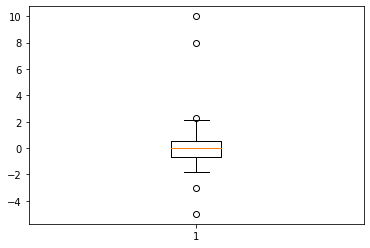

In [27]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

아래의 박스 플롯에서 박스를 벗어난 점들이 보이시나요?

우리는 사분위범위수 IQR(Interquartile range)을 이용하여 이상치를 찾아낼 수 있습니다.

IQR = Q3 − Q1

즉, IQR은 제 3사분위수에서 제 1사분위 값을 뺀 값으로 데이터의 중간 50%의 범위라고 생각하시면 됩니다.

Q1−1.5 ∗ IQR 보다 왼쪽에 있거나, Q3 + 1.5 ∗ IQR  보다 오른쪽에 있는 경우 우리는 이상치라고 판단합니다.

아래 그림을 보면 이 식의 의미가 좀 더 와닿을 겁니다.

![IMG](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1920px-Boxplot_vs_PDF.svg.png)

IQR을 구하기 위해 우선 제1사분위수와 제3사분위수를 구합니다.

In [28]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
IQR

1.1644925829790964

IQR과 제 1사분위수, 제 3사분위수를 이용하여 이상치를 확인할 수 있습니다.

In [29]:
data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

outlier를 검출하는 자세한 내용은 아래 링크에서 확인해봅시다.

- [Three ways to detect outliers](http://colingorrie.github.io/outlier-detection.html)

무역수지를 기준으로 이상치를 찾는 실습해보도록 하겠습니다. 아래 코드에서 outlier2(df, col) 메소드를 구현해 보세요.

In [30]:
def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)].index
    
outlier2(trade, '무역수지')

Int64Index([], dtype='int64')

<br/>

## 정규화 (Normalization)

trade 데이터를 보면 수입건수, 수출선수와 수입금액, 수출금액, 무역수지는 단위가 다르다는 것을 알 수 있습니다.

이처럼 칼럼마다 스케일이 크게 차이가 나는 데이터를 입력하면 머신러닝 모델 학습에 문제가 발생할 수 있습니다.

예를 들어 데이터의 범위가 0에서 1 사이인 컬럼 A과 1000에서 10000 사이인 컬럼 B이 있다고 생각해봅시다. 이런 데이터를 클러스터링한다고 가정해봅시다. 데이터 간의 거리를 잴 때, 범위가 큰 컬럼 B의 값에만 영향을 크게 받을 것입니다. 다른 예시로 간단한 linear regression을 한다고 가정해봅시다. 모델의 파라메터를 업데이트 하는 과정에서 범위가 큰 컬럼 B의 파라메터만 집중적으로 업데이트 하는 문제가 생길 수 있습니다.


그래서 일반적으로 컬럼간에 범위가 크게 다를 경우 전처리 과정에서 데이터를 정규화합니다.

정규화를 하는 방법은 다양하지만, 가장 잘 알려진 **표준화(Standardization)** 와 **Min-Max Scaling**을 알아보도록 하겠습니다.

1. **Standardization**
    - ![img](https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2020/04/04155631/1426878678.png)
    - 데이터의 평균은 0, 분산은 1로 변환


2. **Min-Max Scaling**
    - ![img](https://qph.fs.quoracdn.net/main-qimg-0d692d88876aeb26b1f1a578d1c5a94e.webp)
    - 데이터의 최솟값은 0, 최댓값은 1로 변환

정규화 기법이 데이터의 분포를 어떻게 바꾸는지 살펴볼까요? 우선 임의의 데이터를 생성하고, 각각의 기법으로 데이터를 정규화시켜줍니다.

In [31]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
np.random.seed(2020)
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,-3.075383,-0.448552
1,4.302209,-2.151012
2,-0.522519,-1.245304
3,1.394279,-1.169169
4,0.427537,-0.458080
...,...,...
95,13.250265,-0.734271
96,0.137697,-2.041710
97,2.614901,-3.057545
98,7.866735,-2.140529


In [32]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x - x.mean())/x.std()
x_standardization

,A,B
0,-1.862058,0.559307
1,0.072383,-1.132240
2,-1.192684,-0.232338
3,-0.690090,-0.156691
4,-0.943575,0.549839
...,...,...
95,2.418607,0.275419
96,-1.019573,-1.023639
97,-0.370038,-2.032961
98,1.007019,-1.121824


In [33]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.012283,0.607216
1,0.458634,0.267692
2,0.166733,0.448318
3,0.282702,0.463502
4,0.224213,0.605316
...,...,...
95,1.000000,0.550235
96,0.206677,0.289490
97,0.356550,0.086901
98,0.674291,0.269782


다음 이미지는 데이터를 Standardization 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다. 즉, 각 컬럼의 평균은 0으로, 분산은 1로 데이터를 바꿔줍니다.

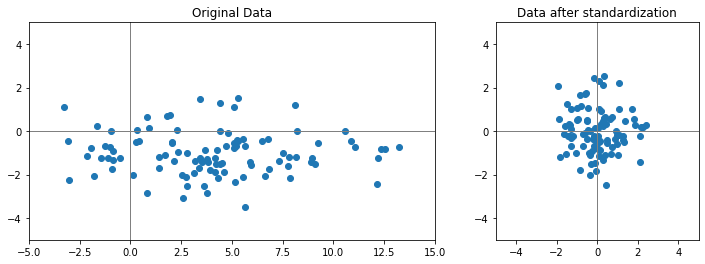

In [34]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

다음 이미지는 동일한 데이터를 min-max scaling 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다. 즉, 각 컬럼의 최소값은 0, 최대값은 1로 바꿔줍니다.

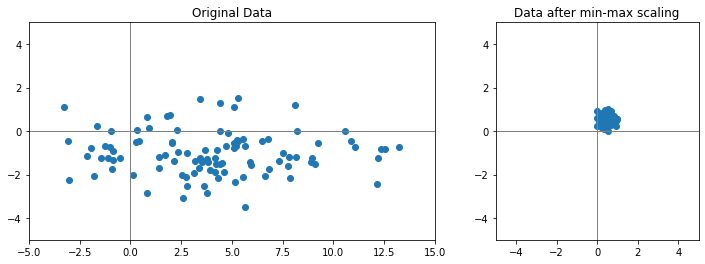

In [35]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

그럼 우리가 가진 trade 데이터를 살펴봅시다.

### Standardization

우선 정규화를 시켜야 할 수치형 컬럼들을 cols 변수에 담은 후, 데이터에서 평균을 빼고, 표준편차로 나눠주도록 합니다.

In [36]:
# trade 데이터를 Standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_Standardization= (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_Standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


In [37]:
trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.019128e-16,5.921189e-17,6.091993e-17,-8.312439e-17,3.074464e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


standardization 방법으로 정규화시킨 trade_Standardization을 확인해보면 각 컬럼의 평균들을 보면 거의 0에 가깝고, 표준편차는 1에 가까운 것을 확인하실 수 있습니다.

### Min-Max Scaling

데이터에서 최솟값을 빼주고, `최댓값-최솟값`으로 나눠줍니다.


In [38]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다. 
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


In [39]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397180
std,0.156108,0.302099,0.235988,0.273790,0.247655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


Min-Max Scaling 방법으로 정규화시킨 후, 각 컬럼의 최솟값(min)은 0이고, 최댓값(max)은 1임을 확인할 수 있습니다.

**주의!!** train 데이터와 test 데이터가 나눠져 있는 경우 *train 데이터를 정규화 시켰던 기준 그대로 test 데이터도 정규화* 시켜줘야 합니다.

<br/>

**scikit-learn**의 `standardscaler`, `minmaxscaler`를 사용하는 방법도 있습니다.



In [40]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()

In [41]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [42]:
scaler.transform(test)

array([[-0.25,  0.55]])

이번 스텝에서 언급하지 않았지만, **로그 변환** 등의 기법도 정규화화 함께 사용하면 도움이 될 수 있다는 것도 기억해 주세요!

## 원-핫 인코딩 (One-Hot Encoding)

이제 범주형 데이터인 국가명 컬럼을 다뤄보도록 하겠습니다.

머신러닝이나 딥러닝 프레임워크에서 범주형을 지원하지 않는 경우 원-핫 인코딩을 해야 합니다. 그럼 다시 한번 원-핫 인코딩에 대해서 알아볼까요?

원-핫 인코딩이란 *카테고리별 이진 특성을 만들어 해당하는 특성만 1 나머지는 0으로 만드는 방법*입니다.

pandas에서 `get_dummies` 함수를 이용해 쉽게 원-핫 인코딩을 만들 수 있습니다.

In [43]:
# trade 데티어의 국가명 칼럼 원본
print(trade['국가명'].head(10))

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
5    일본
6    중국
7    미국
8    일본
9    중국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


`pd.concat` 함수로 데이터 프레임 trade와 country를 합쳐줍시다.

In [44]:
trade = pd.concat([trade, country], axis = 1)
trade.head(10)

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0
5,2015년 02월,일본,0.000000,0.023306,0.001901,0.114350,0.097732,0,1,0
6,2015년 03월,중국,0.143617,0.778210,0.119186,0.576069,0.782345,0,0,1
7,2015년 03월,미국,0.056584,0.390099,0.318885,0.144042,0.581375,1,0,0
8,2015년 03월,일본,0.023700,0.032983,0.013593,0.188761,0.053373,0,1,0
9,2015년 04월,중국,0.146509,0.770376,0.150022,0.633488,0.726979,0,0,1


나라별 칼럼을 새로 생성했으니, 국가명 칼럼을 삭제해줍시다.

In [45]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head(10)

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0
5,2015년 02월,0.000000,0.023306,0.001901,0.114350,0.097732,0,1,0
6,2015년 03월,0.143617,0.778210,0.119186,0.576069,0.782345,0,0,1
7,2015년 03월,0.056584,0.390099,0.318885,0.144042,0.581375,1,0,0
8,2015년 03월,0.023700,0.032983,0.013593,0.188761,0.053373,0,1,0
9,2015년 04월,0.146509,0.770376,0.150022,0.633488,0.726979,0,0,1


## 구간화 (Binning)

지금까지 trade 데이터를 다루면서 다양 전처리 기법을 배웠습니다. 이제 다른 전처리 기법을 배워보도록 하겠습니다.

salary에 소득 데이터가 있다고 합시다.

In [46]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])

이 데이터를 구간별로 나누고자 합니다. 이러한 기법을 **구간화**(`Data binning` 혹은 `bucketing`)이라고 부릅니다.

아래 히스토그램과 같이 연속적인 데이터를 구간을 나눠 분석할 때 사용하는 방법입니다.



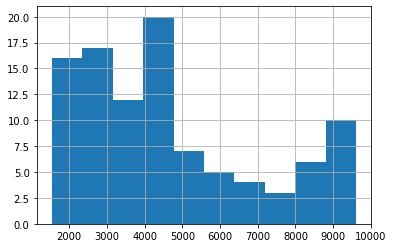

In [47]:
salary.hist()

pandas의 `cut` 과 `qcut`을 이용해 *수치형 데이터를 범주형 데이터로 변형*시키도록 하겠습니다.

`cut`을 사용하기 위해 우선 구간을 정해줍니다.

In [48]:
bins = [0, 2000, 4000, 6000, 8000, 10000]

In [49]:
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

`salary[0]`는 4300으로 4000에서 6000 사이에 포함되었다는 것을 확인할 수 있습니다.

In [50]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


구간별로 값이 몇 개가 속해 있는지 `value_counts()`로 확인해보겠습니다.

In [51]:
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

이렇게 특정 구간을 정해줘도 되고, 구간의 개수를 지정해줄수도 있습니다.

`bins` 옵션에 정수를 입력하면 데이터의 최솟값에서 최댓값을 균등하게 `bins` 개수만큼 나누어줍니다. 

In [52]:
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [53]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

`qcut`은 구간을 일정하게 나누는 것이 아니라 *데이터의 분포를 비슷한 크기의 그룹*으로 나눠줍니다.

In [54]:
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [55]:
ctg.value_counts().sort_index()

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64

<br/>

## 마무리와 복습 과제

오늘은 표 데이터 전처리하는 방법을 배웠습니다.

그러나 오늘 배운 내용을 모든 데이터에 일괄적으로 적용해야 하는 것은 아닙니다. 데이터 전처리는 데이터 특성을 파악해서 해야합니다.

그래서 다소 번거롭지만 꼭 해야하는 과정인 만큼 복습해보세요. 

- [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)

위는 캐글의 Video Games Sales 데이터셋입니다. 16,500개 이상의 비디오 게임에 대한 매출 정보 등이 담겨있습니다. 위의 언급된 전처리 기법 중 다수를 시도해볼 수 있는 데이터셋이므로, 오늘 배운 내용을 제대로 습득할 수 있게 도전해보시길 권장드립니다.